In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
import matplotlib
import pylatexenc
from qiskit.quantum_info import Statevector
from qiskit import Aer
from math import pi
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
%qiskit_version_table
from qiskit_textbook.games import hello_quantum
from qiskit_textbook.games.hello_quantum import *
from utils_Cha.game_Cha import *

In [4]:
# Basic tools
backend = Aer.get_backend('aer_simulator')

# Concepts
$R_x(\theta) = \begin{bmatrix}\cos(\theta/2) & -i\sin(\theta/2)\\-i\sin(\theta/2) & \cos(\theta/2)\end{bmatrix}$\
$R_y(\theta) = \begin{bmatrix}\cos(\theta/2) & -\sin(\theta/2)\\ \sin(\theta/2) & \cos(\theta/2)\end{bmatrix}$\
$R_z(\theta) = \begin{bmatrix}e^{-i\theta/2} & \\ & e^{i\theta/2}\end{bmatrix}$

# My first quantum circuit
We need classical bits to store the measurements of our qubits.

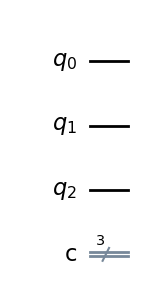

In [3]:
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw(output='mpl')  # returns a drawing of the circuit

Next, we need a way to tell our quantum computer to measure our qubits and record the results.

In [ ]:
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

┌─┐      
q_0: ┤M├──────
     └╥┘┌─┐   
q_1: ─╫─┤M├───
      ║ └╥┘┌─┐
q_2: ─╫──╫─┤M├
      ║  ║ └╥┘
c: 3/═╩══╩══╩═
      0  1  2

Simulating a quantum computer is believed to be difficult for classical computers, as the best algorithms we have grow exponentially with the number of qubits. As such, these simulations are only possible for circuits with small numbers of qubits (up to ~30 qubits), or certain types of circuits for which we can use some tricks to speed up the simulation. Nevertheless, simulators are very useful tools for designing smaller quantum circuits.

In [ ]:
sim = AerSimulator()  # make new simulator object

To do the simulation, we can use the simulator’s .run() method. This returns a "job", which contains information about the experiment, such as whether the experiment is running or completed, the backend it ran on, and (importantly for us), the results of the experiment.

To get the results from the job, we use the results method, and the most popular way to view the results is as a dictionary of "counts".

In [ ]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

The keys in counts dictionary are bit-strings, and the values are the number of times that bit-string was measured. Quantum computers can have randomness in their results, so it's common to repeat the circuit a few times. This circuit was repeated 1024 times, which is the default number of times to repeat a circuit in Qiskit. By convention, qubits always start in the state 0, and since we are doing nothing to them before measurement, the results are always 0.

# Encoding an input
Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: 0 becomes 1 and 1 becomes 0. For qubits, we use a gate known as the X-gate for this.

Below, we’ll create a new circuit dedicated to the job of encoding:

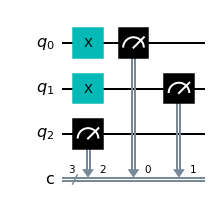

In [ ]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')    # returns a drawing of the circuit

In [ ]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

# Adding with quantum circuits
In Qiskit, we can use the .cx() method to add a CNOT to our circuit. We need to give the indices of the two qubits it acts on as arguments.

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

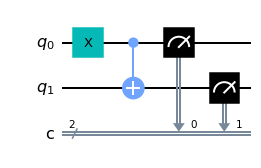

Result:  {'11': 1024}


In [ ]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())
display(qc.draw(output='mpl'))     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

In Qiskit, we can add Toffoli gate to a circuit using the .ccx() method.

┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

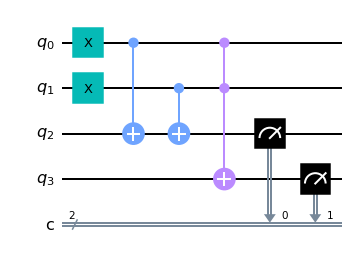

In [ ]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
display(test_qc.draw())
display(test_qc.draw(output='mpl'))

In [ ]:
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'10': 1024}

The half adder contains everything you need for addition. With the NOT, CNOT, and Toffoli gates, we can create programs that add any set of numbers of any size.

These three gates are enough to do everything else in computing too. In fact, we can even do without the CNOT. Additionally, the NOT gate is only really needed to create bits with value 1. The Toffoli gate is essentially the atom of mathematics. It is the simplest element, from which every other problem-solving technique can be compiled.

[1.+0.j,0.+0.j,0.+0.j,0.+0.j]

<IPython.core.display.Latex object>

' |00\\rangle'

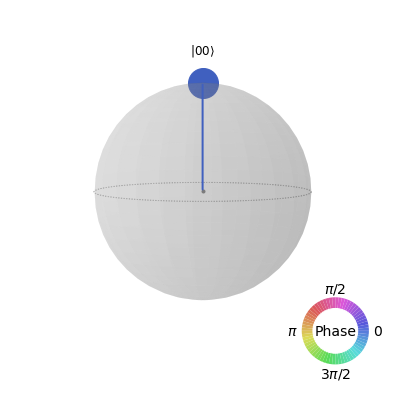

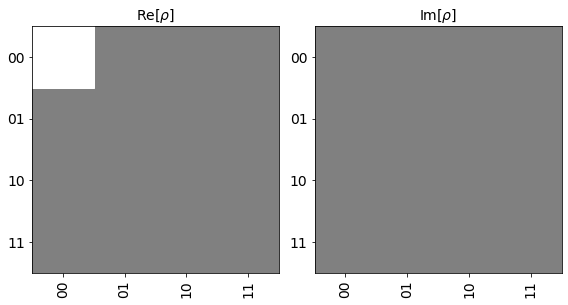

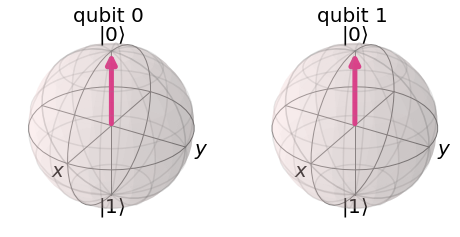

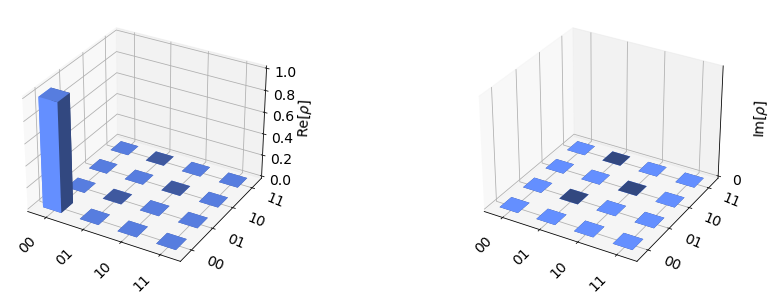

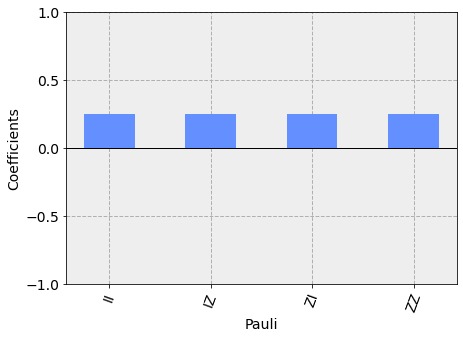

In [ ]:
qc = QuantumCircuit(2)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
display(ket.draw(output='text'))
display(ket.draw(output='latex'))
display(ket.draw(output='latex_source'))
display(ket.draw(output='qsphere'))
display(ket.draw(output='hinton'))
display(ket.draw(output='bloch'))
display(ket.draw(output='city'))
display(ket.draw(output='paulivec'))

In [ ]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [ ]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(2)

qc.x(1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [ ]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

# Entanglement

In [ ]:
# Let's create a fresh quantum circuit
qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [ ]:
# Entangled state
qc.cx(1,0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

# The cx gate revisited
For example, let's start with the case where both qubits are in the $|+\rangle$ state.

In [ ]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

Here we will also find that the cx has no effect, no matter which way around we do it.

In [ ]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

However, let's now flip the target qubit from $|+\rangle$ to $|-\rangle$ using the single qubit z gate.

In [ ]:
qc.z(0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

If we do the cx now, we will see an effect. It flips the control qubit to $|-\rangle$ as well.

In [ ]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

This effect is sometimes known as 'phase kickback': When there is a superposition on both the control and target qubits, some features of the target superposition can feed back into the control.

This effect can also motivate us to make an alternative interpretation of the cx. We can think of it as applying a z to the control if the target is in $|-\rangle$ state , and do nothing if it is in $|+\rangle$ state .

# Entangled states and simulation
Useful quantum algorithms need to be able to do things that classical computers cannot simulate, so they must work in a way that prevents tricks like this (keeping track of everything with a very manageable $2n$ amplitudes) from being found. They must involve more complex manipulations of the qubits, creating states for which there are no easy shortcuts. This means that they must use states for which the full $2^n$ amplitude description is needed, and so will need to involve more than just product states. And since anything that is not a product state is an entangled state, we find that entanglement is a necessary ingredient of any quantum advantage.

# Qubits working together: Superdense coding
For classical communication there is a fundamental limit on how much information we can send with a given number of bits. By definition, we can send no more than $n$ bits of information when we send $n$ bits. For quantum information, much the same rule applies: no more than $n$ bits of information can be reliably encoded and retrieved from $n$ qubits. However, there are ways that we can push the boundaries to do things that are not possible classically, and for that we require entanglement. Here we will look at one such example, in which transferring one qubit can allow a two bit message to be sent.

Suppose we have two people: Alice and Bob. Alice wishes to send a two bit message to Bob - 00, 01, 10 or 11 - and wants to do it by sending qubits.

The simplest way to do this is with two qubits. Alice can simply use the qubits to encode the bit values, applying an x to flip them for a 1 state.

In [ ]:
# The message
MESSAGE = '00'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

In [ ]:
backend = Aer.get_backend('aer_simulator')

# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

This protocol did not involve any entanglement. One way to insert it would be for Alice to add h and cx gates after encoding the information. Let's look at the states that are created by these gates.

In [ ]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket = Statevector(qc_alice)
ket.draw(output='latex')

<IPython.core.display.Latex object>

00 $\rightarrow |\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$\
01 $\rightarrow |\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$\
10 $\rightarrow |\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$\
11 $\rightarrow |\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

When Bob receives these states he needs to disentangle them, by undoing the h and cx. Then he can measure and retrieve the message as before.

In [ ]:
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

qc_bob.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├─────┤M├───
     └─┬─┘┌───┐└╥┘┌─┐
q_1: ──■──┤ H ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Alice could send her message by creating an entangled state first, and then changing it using x and z gates to encode the correct message.

In [ ]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

ket = Statevector(qc_alice)
ket.draw(output='latex')

<IPython.core.display.Latex object>

Since Bob is receiving the same states as before, he doesn't need to change his circuit at all.

In [ ]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

The important thing to note here is that the x and z gates can be applied to just a single qubit (qubit 1 in this case). This means that Alice could send qubit 0 to Bob as soon as she has created the entangled pair. In fact, she could send it before she even knows what message she wants to send!

This gets even more surprising if you imagine a third party, whose job is just to create $|\Phi^+\rangle$ states and send the qubits out.

In [ ]:
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)

qc_charlie.draw()

┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ H ├──■──
     └───┘     
c: 2/══════════

<img src='https://learn.qiskit.org/content/intro/images/multi-qubit/superdense.jpg'>

This third party can directly send one qubit to Bob, and then the other to Alice. Alice can encode her two qubit message by manipulating just this single qubit, and send only this one qubit to Bob.

In [ ]:
MESSAGE = '11'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

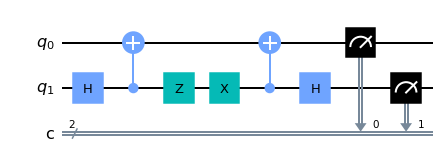

{'11': 1024}

In [ ]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
display(complete_qc.draw(output='mpl'))
backend.run(complete_qc).result().get_counts()

The end result of all this is that Alice sent two bits of information to Bob, and only had to send one qubit to do it. This was made possible by the fact that the qubit was part of an entangled pair. As such, while Alice was just applying gates to one qubit, she was manipulating the larger set of four possible states this entangled pair can be in.

This serves as a simple example of how qubits can allow us to do things that normal bits cannot, and how entanglement is a crucial resource for this.

# Measuring a qubit
The only information we extract from a qubit is through measurement: We apply the measure operation and get back a 0 or a 1. The way that this is physically implemented in a quantum computer depends on the details of how your qubit is built. For some types of qubit, it's possible to rotate the measurement device to do different kinds of measurement, and see different behavior from the results.

For other kinds of qubit, rotating your measurement device will just break it. Nevertheless, there is a simple way to get the same effect: just rotate the qubit instead! By performing single qubit gates before making a standard measurement, we reproduce the effects of these alternative forms of measurement.

The most common example of this is to simply perform an h gate immediately before measurement. This gives us what is known as an x measurement.

In [ ]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_x.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

The standard form of measurement, which is done with just a measure gate, is known as a z measurement in this context.

In [ ]:
meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_z.draw()

┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0

Now let's look at what happens to certain states when we do these measurements. We'll start with the simple $|0\rangle$ state.

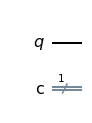

In [ ]:
qc = QuantumCircuit(1,1)

qc.draw(output='mpl')

For the standard measurement, as we know, this is certain to output 0.

In [ ]:
z_meas_counts = backend.run(qc.compose(meas_z)).result().get_counts()
print('Results from z measurement:', z_meas_counts)

Results from z measurement: {'0': 1024}


For an x measurement, however, we'll get completely random results.

In [ ]:
x_meas_counts = backend.run(qc.compose(meas_x)).result().get_counts()
print('Results from x measurement:', x_meas_counts)

Results from x measurement: {'1': 511, '0': 513}


A similar situation occurs for the $|1\rangle$ state.

In [ ]:
qc = QuantumCircuit(1,1)
qc.x(0)

qc.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

In [ ]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 1024}
Results from x measurement: {'1': 519, '0': 505}


The tables are turned for the $|+\rangle$ state.

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)

qc.draw()

┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════

In [ ]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    display(qc.compose(circ).draw())
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

Results from z measurement: {'1': 468, '0': 556}


┌───┐┌───┐┌─┐
  q: ┤ H ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

Results from x measurement: {'0': 1024}


For other states we can find a compromise between the two. For example, we can try out different angles for ry rotations.

In [ ]:
from math import pi

qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0)

qc.draw()

┌──────────┐
  q: ┤ Ry(-π/4) ├
     └──────────┘
c: 1/════════════

In [ ]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())
    # Both expected to contain 874.0387

Results from z measurement: {'1': 132, '0': 892}
Results from x measurement: {'0': 152, '1': 872}


# The uncertainty principle
There are two different ways that we could choose to encode a bit of information in a qubit. We can do it the normal way, using the $|0\rangle$ and $|1\rangle$ states to encode the bit values 0 and 1 and using the z measurement to read it out. Or we could do it an alternative way, using the $|+\rangle$ and $|-\rangle$ states to encode the bit values and the x measurement for read out. But the uncertainty principle makes sure that we can't do both at once.

For any valid state vector $\langle Z \rangle^2 + \langle X \rangle^2 = \left( p_z(0) - p_z(1)\right)^2 + \left( p_x(0) - p_x(1)\right)^2 \leq 1$.\
$\mathit{proof})$ Let the state vector be $\begin{bmatrix}a\\ b\end{bmatrix}\in \mathbb{C}^2$ s.t. $|a|^2 + |b|^2 = 1$. Since $H\begin{bmatrix}a\\ b\end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix}a + b\\ a - b\end{bmatrix}$, it suffices to show that $(|a|^2 - |b|^2)^2 + \frac{1}{4}(|a + b|^2 - |a - b|^2)^2 \leq 1$.\
\begin{equation}
\begin{split}
\langle Z \rangle^2 + \langle X \rangle^2 & = (|a|^2 - |b|^2)^2 + \frac{1}{4}(|a + b|^2 - |a - b|^2)^2\\
& = (|a|^2 - |b|^2)^2 + \frac{1}{4}(2\bar{a}b + 2a\bar{b})^2\\
& = (|a|^2 - |b|^2)^2 + (\bar{a}b + a\bar{b})^2\\
& = (|a|^2 - |b|^2)^2 + 2\bar{a}a\bar{b}b + \bar{a}^2 b^2 + a^2 \bar{b}^2\\
& = (|a|^2 - |b|^2)^2 + 2|a|^2 |b|^2 + \bar{a}^2 b^2 + a^2 \bar{b}^2\\
& = |a|^4 + |b|^4 + \bar{a}^2 b^2 + a^2 \bar{b}^2\\
& = \bar{a}^2 a^2 + \bar{b}^2 b^2 + \bar{a}^2 b^2 + a^2 \bar{b}^2\\
& = (\bar{a}^2 + \bar{b}^2)(a^2 + b^2)\\
& = |a^2 + b^2|^2\\
& \leq |a^2 + b^2|^2\\
& = (|a|^2 + |b|^2)(|a|^2 + |b|^2)\\
& = 1
\end{split}
\end{equation}$\blacksquare$

# Unique quantum correlations
Let's again consider our friends Alice, Bob, and Charlie. Charlie creates a particular entangled state and sends one qubit to Alice and the other to Bob. They make measurements and compare the results. Then Charlie sends another, identically prepared state. This repeats many times, so Alice and Bob can build up statistics on all the different measurement results.

Let's consider the case where Charlie sends out the following entangled state.

In [ ]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)

qc_charlie.draw()

┌───┐┌───────────┐┌───┐┌───────────┐
q_0: ─────────────┤ X ├┤ Ry(0.785) ├┤ X ├┤ Ry(2.356) ├
     ┌───────────┐└─┬─┘└───────────┘└─┬─┘└───────────┘
q_1: ┤ Ry(1.911) ├──■─────────────────■───────────────
     └───────────┘                                    
c: 2/═════════════════════════════════════════════════

First Alice and Bob try making z measurements of their qubits.

In [ ]:
meas_zz = QuantumCircuit(2,2)
meas_zz.measure([0,1],[0,1])

From many samples, they find the following results.

Results for z measurements:


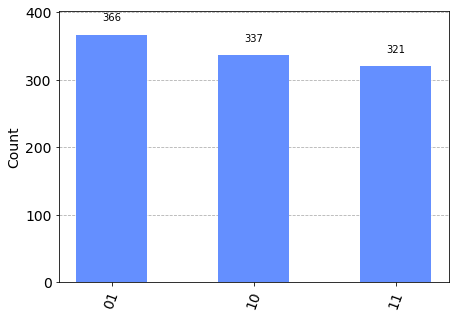

In [ ]:
print('Results for z measurements:')
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

From this they make the observation that the qubits never both output 0 for z measurements.

Next, let's see the results of an when Bob performs an x measurement and Alice performs a z measurement.

Results for a z and an x measurement:


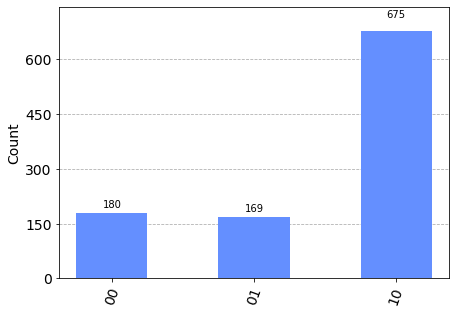

In [ ]:
meas_zx = QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1],[0,1])

print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
plot_histogram(counts)

In this case we find that the qubits never both output 1. The same is true when Bob makes the z measurement and Alice does the x.

Results for an x and a z measurement:


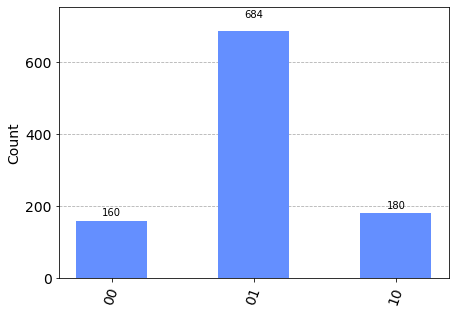

In [ ]:
meas_xz = QuantumCircuit(2,2)
meas_xz.h(1)
meas_xz.measure([0,1],[0,1])

print('Results for an x and a z measurement:')
counts = backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
plot_histogram(counts)

With this information, Alice and Bob can begin to speculate about what would happen if they both performed an x measurement.

They can summarize their results so far in the following two observations:

If z measurements are made on both qubits, they never both output 0;
If an x measurement of one qubit outputs 1, a z measurement of the other will output 0 (because the 11 result never occurs in these cases).
These correspond exactly to the observations made for the colored shapes in the classical scenario. If we apply the same logic as we did in that case, we can analyse the case where both Alice and Bob make an x measurement, and they both get the result 1. Bob would then be able to apply observation 2 and infer that Alice would certainly have gotten a 0 if she had instead done a z measurement. Alice can do the same, inferring that Bob would have gotten a 1 if he'd have made a z measurement. So together they conclude that, if they had both made z measurements, they would both have gotten the output 0. Since observation 1 shows us that such a result would be impossible, Alice and Bob could predict that the 11 result will never occur.

So let's see if they would be right.

Results for an x and an x measurement:


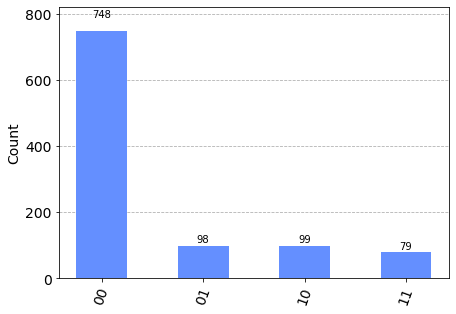

In [ ]:
meas_xx = QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])

print('Results for an x and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)

They would not! The 11 result is not likely, but it is certainly not impossible.

The results of qubits are not well-defined before measurement. Though this might seem like it means that qubits are more random than classical variables, it is not always a negative quality. It also means that restrictions applied to classical variables do not always apply to qubits, and that quantum correlations can have properties that would be impossible classically. These unique correlations are one of the signature properties of entangled states.

# Exercises
Exercise 1: Flipping a Qubit\
Exercise 2: Swapping the Axes

In [3]:
# puzzle = game_Cha(1, 1)